In [2]:
from keras import backend as K
K.set_image_dim_ordering('tf')
from keras.models import model_from_json
import os,cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
json_file = open('C:\\Users\\Luigi Ocampo\\Documents\\DLSU\\Thesis\\Final Code\\thesis_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("C:\\Users\\Luigi Ocampo\\Documents\\DLSU\\Thesis\\Final Code\\thesis_model.h5")
print("Model has been loaded!")

Model has been loaded!


In [282]:
img_channel = 1
orig = cv2.imread(r'C:\Users\Luigi Ocampo\Downloads\FTP Data Trial\img5_32.jpg')
gray = cv2.cvtColor(orig, cv2.COLOR_BGR2GRAY)
res = cv2.resize(gray,(150,150))
test = np.array(res)
test = test.astype('float32')
test /= 255
test = np.expand_dims(test, axis=3) 
test = np.expand_dims(test, axis=0)
accuracy = loaded_model.predict(test)[0]
label = loaded_model.predict_classes(test)
conf = accuracy*100

C:\Users\Luigi Ocampo\Anaconda3\envs\thesis\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  


Miguel De Guzman -  100.0 %


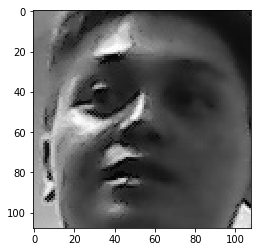

In [283]:
if label == [0]:
    plt.imshow(orig)
    print("Aeisha Zamudio - ", conf[0], "%")
elif label == [1]:
    plt.imshow(orig)
    print("Luigi Ocampo - ", conf[1], "%")
elif label == [2]:
    plt.imshow(orig)
    print("Miguel De Guzman - ", conf[2], "%")
elif label == [3]:
    plt.imshow(orig)
    print("Jonathan Subong - ", conf[3], "%")